## Define the "Best":
To my definition, the best neighborhood must contain: a good ratio and well constructed sidewalks and streets, relevently safe, and affordable home values with a good ratio of increasing in price. Thus, I conducted the two metrics below to analyze the walkability and home values with a good ratio of increasing in price.

## Submetric 1: Sidewalk "Walkability"



             GEOID       NAMELSAD  SidewalkStepLFt     StreetLFt     Ratio
1655  420730104003  Block Group 3              NaN           NaN       NaN
1259  420076048002  Block Group 2              NaN           NaN       NaN
2048  421298068001  Block Group 1              NaN           NaN       NaN
517   420034520003  Block Group 3     31817.833290  100621.09840  0.316214
728   420034810002  Block Group 2     18962.153750   13673.84825  1.386746
1995  421298045022  Block Group 2              NaN           NaN       NaN
539   420034580001  Block Group 1      5710.885387   34048.86496  0.167726
1261  420076049011  Block Group 1              NaN           NaN       NaN
1718  421257210002  Block Group 2              NaN           NaN       NaN
1308  420199024002  Block Group 2              NaN           NaN       NaN


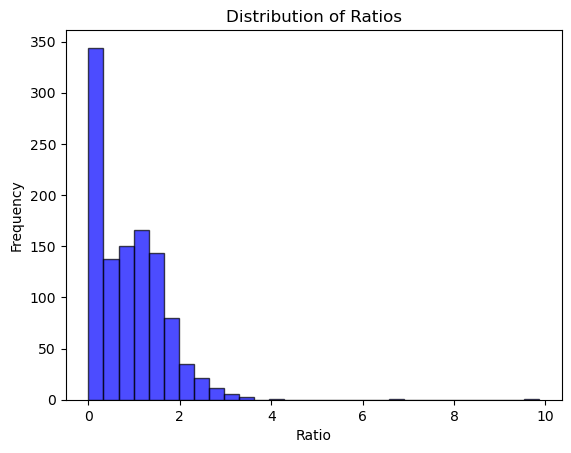

Skewness of the distribution: 2.224216918805661
The distribution is positively skewed.
The median of the ratio is 0.7874742425000001, representing the best match for the dataset.
The row with the closest ratio to the median is at index 340, with a ratio of 0.789819546, and the GEOID is 420034120011.


In [ ]:
#Set up the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew


# Load data
sidewalk = pd.read_csv("sidewalkstreetratioupload.csv")
print(sidewalk.sample(10))

#Visualize the distribution
plt.hist(sidewalk['Ratio'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Ratios')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

# Measure skewness
distribution_skewness = skew(sidewalk['Ratio'].dropna())
print(f"Skewness of the distribution: {distribution_skewness}")

if distribution_skewness > 0:
    print("The distribution is positively skewed.")
elif distribution_skewness < 0:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is symmetric.")

# Find the most balanced ratio, since the distribution is positively skewed, we take the median as our best match ratio.
median_ratio = sidewalk['Ratio'].median()
print(f"The median of the ratio is {median_ratio}, representing the best match for the dataset.")

# Find the row with the closest ratio to the median
sidewalk['deviation_from_median'] = np.abs(sidewalk['Ratio'] - median_ratio)
closest_index = sidewalk['deviation_from_median'].idxmin()
closest_row = sidewalk.loc[closest_index]
closest_ratio = closest_row['Ratio']
closest_geoid = closest_row['GEOID']

print(f"The row with the closest ratio to the median is at index {closest_index}, with a ratio of {closest_ratio}, and the GEOID is {closest_geoid}.")

File were collected in tract id, thus we need to convert it to the proper name for the neighborhood.

Pitt-neigborhood.csv found to use to transform the data

In [ ]:
# Load data for mapping
mapping = pd.read_csv('Pitt_neighbor.csv')

# Convert both columns to string type to avoid any type mismatch
sidewalk["GEOID"] = sidewalk["GEOID"].astype(str)
mapping["geoid10"] = mapping["geoid10"].astype(str)

# Create a dictionary to map GeoID to neighborhood name
mapping_dict = mapping.set_index("geoid10")["hood"].to_dict()

# Get the neighborhood name for the specific target GeoID
target_geoid = "420034120011"

# Look up the neighborhood name using the dictionary
name = mapping_dict.get(target_geoid, "Not Found")  # "Not Found" if GeoID is not in the dictionary

# Print the result
print(f"The neighborhood for GeoID {target_geoid} is: {name}")

The neighborhood for GeoID 420034120011 is: East Liberty


## Submetric 3: Median of housing price inflations

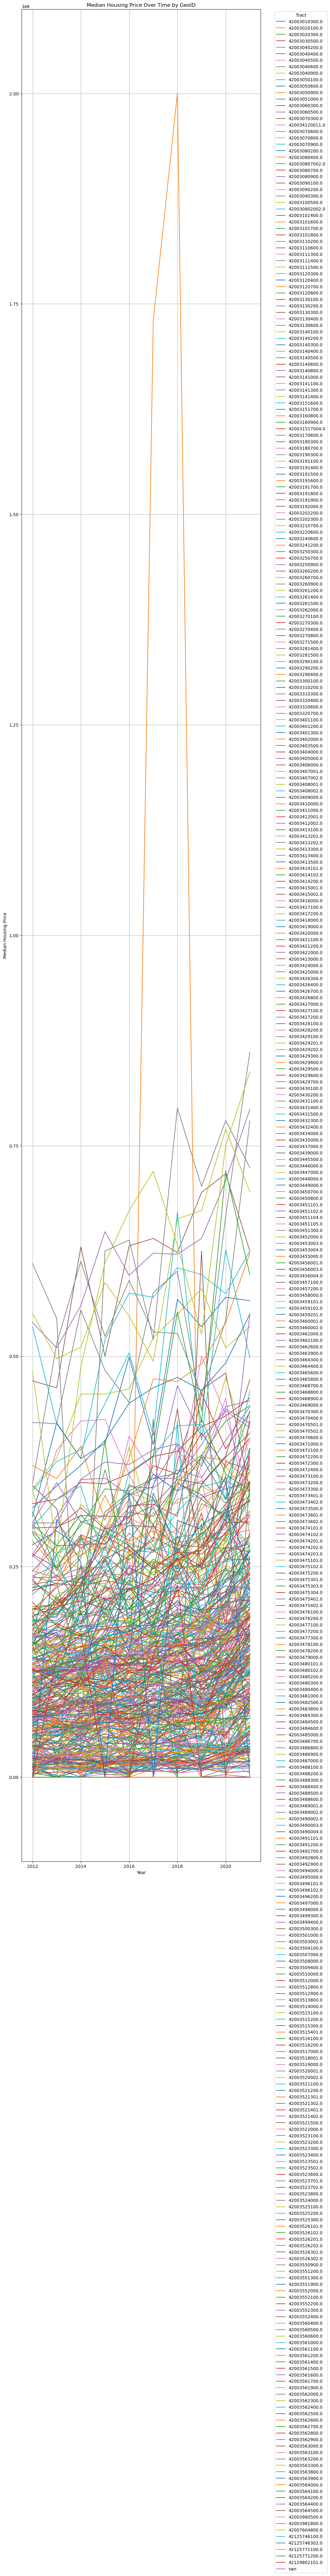

In [ ]:
# Load data
housing = pd.read_csv('tractmediannoinflation.csv')

housing_df_long = housing.melt(id_vars=['Tract'], var_name='Year', value_name='MedianPrice')

#Convert 'Year' to a numeric value (to make it easier to plot)
housing_df_long['Year'] = pd.to_numeric(housing_df_long['Year'])

#Create the line chart
plt.figure(figsize=(10, 6))
for geo in housing_df_long['Tract'].unique():
    geo_data = housing_df_long[housing_df_long['Tract'] == geo]
    plt.plot(geo_data['Year'], geo_data['MedianPrice'], label=geo)

#Show the selected lines for analysis

#selected_tracts = ['42003010300', '42003030500']# Examples  # Replace with desired Tract IDs
#filtered_data = housing_df_long[housing_df_long['Tract'].isin(selected_tracts)]

#Customize the plot
plt.title('Median Housing Price Over Time by GeoID')
plt.xlabel('Year')
plt.ylabel('Median Housing Price')
plt.legend(title='Tract', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.subplots_adjust(top=15, bottom=5)
# Show the plot
plt.show()

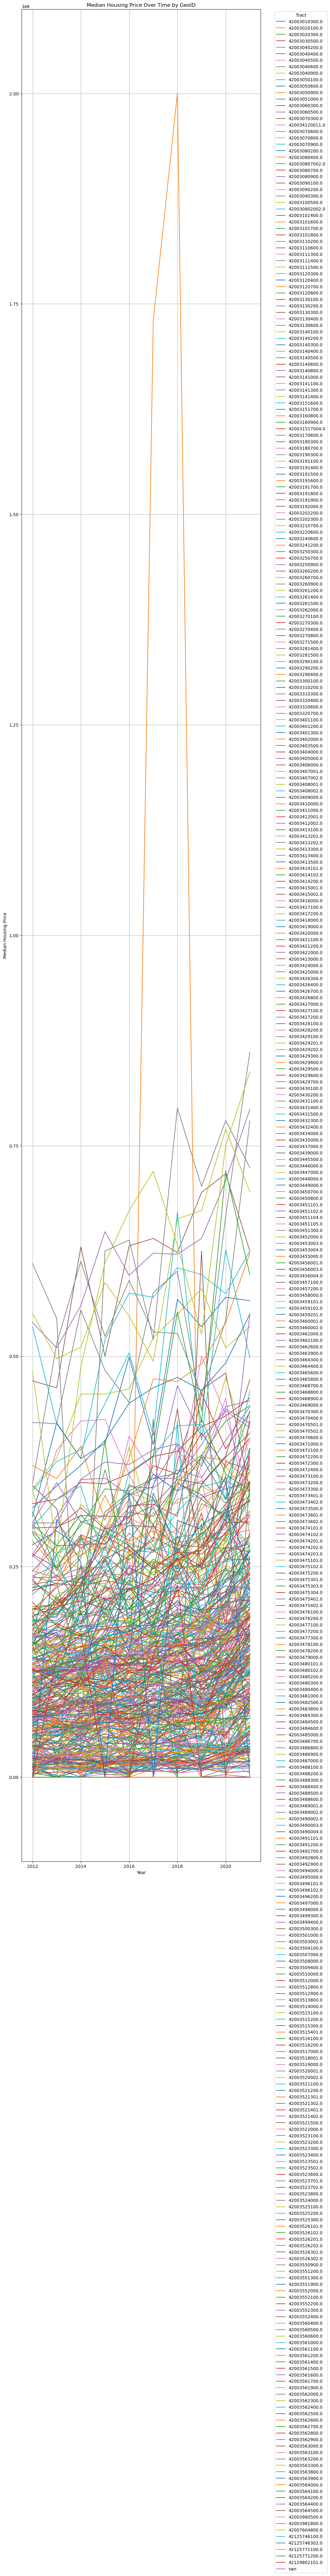

In [ ]:
# Load data
housing = pd.read_csv('tractmediannoinflation.csv')

housing_df_long = housing.melt(id_vars=['Tract'], var_name='Year', value_name='MedianPrice')

#Convert 'Year' to a numeric value (to make it easier to plot)
housing_df_long['Year'] = pd.to_numeric(housing_df_long['Year'])

#Create the line chart
plt.figure(figsize=(10, 6))
for geo in housing_df_long['Tract'].unique():
    geo_data = housing_df_long[housing_df_long['Tract'] == geo]
    plt.plot(geo_data['Year'], geo_data['MedianPrice'], label=geo)

#Show the selected lines for analysis

#selected_tracts = ['42003010300', '42003030500']# Examples  # Replace with desired Tract IDs
#filtered_data = housing_df_long[housing_df_long['Tract'].isin(selected_tracts)]

#Customize the plot
plt.title('Median Housing Price Over Time by GeoID')
plt.xlabel('Year')
plt.ylabel('Median Housing Price')
plt.legend(title='Tract', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.subplots_adjust(top=15, bottom=5)
# Show the plot
plt.show()

In [ ]:
filtered_df = housing[(housing['2021'] * 0.03 <= 18018) & (housing["PriceIncreaseRate"] >= 52)] #cosider taking 3% of down payment 

# Step 5: Identify the GeoID(s) that meet the conditions
print("Tracts with adequate price and increase rate:")
print(filtered_df[['Tract', '2021', 'PriceIncreaseRate']])

Tracts with adequate price and increase rate:
            Tract      2021  PriceIncreaseRate
0    4.200301e+10  210000.0         505.196040
2    4.200302e+10  350000.0        3400.000000
7    4.200304e+10  262540.0         117.875519
8    4.200304e+10  200000.0         203.030303
9    4.200305e+10   31000.0         210.000000
..            ...       ...                ...
381  4.200356e+10  345000.0          77.377892
383  4.200356e+10  170000.0         123.684211
384  4.200356e+10  100000.0          52.671756
385  4.200356e+10  157500.0          90.909091
386  4.200398e+10   85500.0                inf

[276 rows x 3 columns]


In [ ]:
# Convert both columns to string type to avoid any type mismatch
housing["Tract"] = housing["Tract"].astype(str)
mapping["geoid10"] = mapping["geoid10"].astype(str)

# Create a dictionary to map GeoID to neighborhood name
mapping_dict = mapping.set_index("geoid10")["hood"].to_dict()
target_geoid = "420030807002"

# Look up the neighborhood name 
tract_name = mapping_dict.get(target_geoid, "Not Found")  # "Not Found" if GeoID is not in the dictionary

# Print the result
print(f"The neighborhood for GeoID {target_geoid} is: {tract_name}")

The neighborhood for GeoID 420030807002 is: Friendship


## For submetric 3:
I was thinking as the cheapest area to live in, then I find out that Fairwoods, for example, have a low property price and arrest rate, but the sidewalk/street rate was 0.5, which means barely walkable. Thus, I planned to conduct the metric that will calculate the mean for the standard deviation to take the value and find the most appropriate neighborhood in the final notebook.

## Conclusion:
Overally, all my index have pointed to the best neighborhood in Pittsburgh are among Friendship, East Liberty, Greenfield, and Squirrel Hill South. However, the data of Squirrel Hill in households price is missing, so I decided to take the median value of $410,000 from [Redfin]https://www.redfin.com/neighborhood/156380/PA/Pittsburgh/Squirrel-Hill-South/housing-market. Thus, the 3% of first down payment will be $12,300 for Squirrel-Hill-South.